### Genetic algorithm using Pymoo

#### Problem

In [39]:
from pymoo.core.problem import ElementwiseProblem, Problem

### Vectorized problem
class DeterministicProblem_P(Problem):
    def __init__(self):
        super().__init__(n_var=1, #Number of variables
                         n_obj=1, #Number of objective functions
                         n_ieq_constr=0, #Number of inequalities constraints
                         n_eq_constr=0, #Number of equalities constraints
                         xl=-5, #Lower threshold 
                         xu=5) #Upper threshold
        
    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = (x-3)**2

problem_p = DeterministicProblem_P()


### ElementwiseProblem
class DeterministicProblem_EWP(ElementwiseProblem):
    def __init__(self, elementwise=True, **kwargs):
        super().__init__(n_var = 1, #Number of variables
                         n_obj = 1, #Number of objective functions
                         n_ieq_constr=0, #Number of inequalities constraints
                         n_eq_constr=0, #Number of equalities constraints
                         xl = -5, #Lower threshold 
                         xu = 5) #Upper threshold
    
    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = (x-3)**2
        
problem_ewp = DeterministicProblem_EWP()

#### Algorithms

##### Single objective functions

In [40]:
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.algorithms.soo.nonconvex.nelder import NelderMead
from pymoo.optimize import minimize

de_algo = DE(pop_size=50)
ga_algo = GA(pop_size=50)
nm_algo = NelderMead(init_simplex_scale=0.1)

res = minimize(problem=problem_ewp,
               algorithm=ga_algo,
               seed =1,
               verbose = False)

X = res.X
F = res.F

##### Multi-objective functions

In [25]:
import numpy as np

class BNH(Problem):
    def _init_(self):
        super().__init__(n_var= 2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl = np.array([0, 0]),
                         xu = np.array([5,3]))
        
    def _evaluate(self, x, out, *args, **kwargs):

        #Objective functions
        obj1 = 4*(x[:,0]**2) + 4*(x[:,1]**2) #Objective function 1
        obj2 = (x[:,0]-5)**2 + (x[:,1]-5)**2 #Objective function 2

        #Constraints, default orientation of constraints being met is < 0
        const1 = (x[:,0]-5)**2 + x[:,1]**2 - 25
        const2 = 7.7 - (x[:,0]-8)**2 -(x[:,1]+3)**2

        #Stacking objectives to "F" and constraints to "G"
        out["F"] = np.column_stack([obj1, obj2])
        out["G"] = np.column_stack([const1, const2])

In [26]:
bnh_problem = BNH()

In [7]:
def sum(x1, x3):
    n = x1 + x3
    m = x1*x3

    return n, m

print(sum(2,5)[1])

10


In [29]:
from pymoo.util.plotting import plot
n_points = 50 

x1 = np.linspace(0,5, n_points)
x2 = np.linspace(0,3, n_points)

X = np.column_stack([x1, x2])
#plot(bnh_problem.evaluate(X, return_values_of=["F"]))

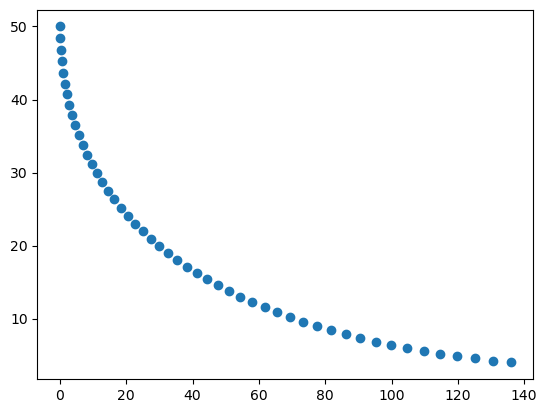

In [2]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem, Problem

class BNH(Problem):
    def __init__(self):
        super().__init__(n_var= 2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl = np.array([0, 0]),
                         xu = np.array([5,3]))
        
    def _evaluate(self, x, out, *args, **kwargs):

        #Objective functions
        obj1 = 4*(x[:,0]**2) + 4*(x[:,1]**2) #Objective function 1
        obj2 = (x[:,0]-5)**2 + (x[:,1]-5)**2 #Objective function 2

        #Constraints, default orientation of constraints being met is < 0
        const1 = (x[:,0]-5)**2 + x[:,1]**2 - 25
        const2 = 7.7 - (x[:,0]-8)**2 -(x[:,1]+3)**2

        #Stacking objectives to "F" and constraints to "G"
        out["F"] = np.column_stack([obj1, obj2])
        out["G"] = np.column_stack([const1, const2])
        

bnh_problem = BNH()

# Let's visualise the problem
from pymoo.util.plotting import plot

n_points = 50

x1 = np.linspace(0, 5, n_points)
x2 = np.linspace(0, 3, n_points)

X = np.column_stack([x1, x2])
plot(bnh_problem.evaluate(X, return_values_of=["F"]))


In [4]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

algorithm = NSGA2(pop_size = 500)

res = minimize(problem = bnh_problem,
               algorithm = algorithm,
               seed=1,
               verbose=True)



n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      500 |    109 |  0.000000E+00 |  0.1780888416 |             - |             -
     2 |     1000 |    173 |  0.000000E+00 |  0.000000E+00 |  0.0033072936 |             f
     3 |     1500 |    244 |  0.000000E+00 |  0.000000E+00 |  0.0795962764 |         nadir
     4 |     2000 |    352 |  0.000000E+00 |  0.000000E+00 |  0.0030563210 |         ideal
     5 |     2500 |    454 |  0.000000E+00 |  0.000000E+00 |  0.0226629360 |         nadir
     6 |     3000 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0049150501 |         nadir
     7 |     3500 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0393080937 |         nadir
     8 |     4000 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0003795086 |             f
     9 |     4500 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0278947071 |         nadir
    10 |     5000 |    500 |  0.000000E+00 |  0.000000E+00 |  0.0002990507 |             f

In [6]:
X = res.X
F = res.F

np.savetxt('Space_values.csv', X, delimiter=",")
np.savetxt('Objective_values.csv', F, delimiter=",")

In [38]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.problems import get_problem
from pymoo.optimize import minimize


problem = get_problem("sphere")
algorithm = GA(pop_size=5)
res = minimize(problem,
               algorithm,
               ('n_gen', 30),
               seed=1)


X = res.X
F = res.F

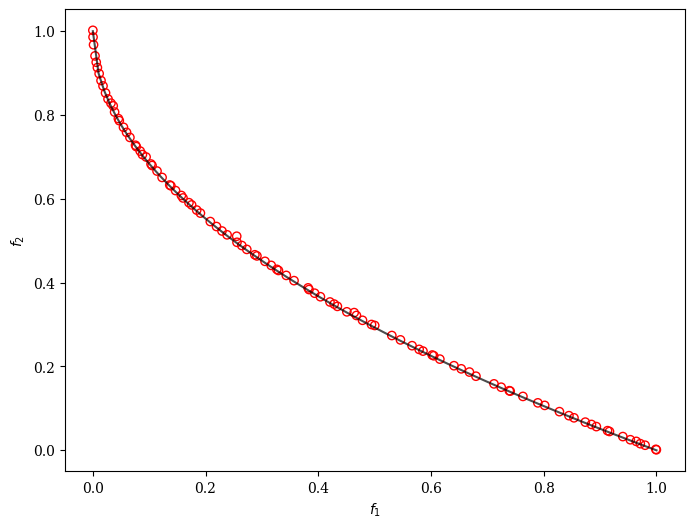

In [3]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [18]:
from pymoo.core.problem import Problem
import math
import xml.etree.ElementTree as ET
import subprocess
import pandas as pd
import sys
import numpy as np
import os
import random
from multiprocessing import Pool

viability = np.loadtxt('../data_output/viability.csv', delimiter=",", skiprows=1)
concentration = np.loadtxt('../data_output/concentration.csv', delimiter=",", skiprows=1)
experimental = np.loadtxt('../../Netlogo_NLCs-CLL/filtered_fused_9patients.csv', delimiter=",", skiprows=1)
viability_exp = experimental[:,1]
concentration_exp = experimental[:,2]
N = 13



obj1 = np.sqrt(np.sum((viability - viability_exp)**2) / N) #RMSE of viability
obj2 = np.sqrt(np.sum((concentration - concentration_exp)**2) / N) #RMSE of concentration

class calibrationProb(Problem):
    def __init__(self):
        super().__init__(n_var = 10,
                       n_obj = 2,
                       xl = np.array([0.9, 0.9, 4e-5, 0.9, 24e-2, 0.9, 91e-2, 0.9, 0.9, 3e-2]),
                       xu = np.array([1.2, 1.2, 6e-5, 1.2, 26e-2, 1.2, 93e-2, 1.2, 1.2, 5e-2]))
        
    def _evaluate(self, x, out):
        #Objective functions
        obj1 = np.sqrt(np.sum((viability - viability_exp)**2) / N) #RMSE of viability
        obj2 = np.sqrt(np.sum((concentration - concentration_exp)**2) / N) #RMSE of concentration

        #Stacking objectives to "F" 
        out["F"] = np.column_stack([obj1, obj2])

NLC_problem = calibrationProb()

test = []
test.append(obj2)

In [27]:
res = np.column_stack([test, test2])

In [16]:
from pymoo.core.problem import Problem

experimental = np.loadtxt('../../Netlogo_NLCs-CLL/filtered_fused_9patients.csv', delimiter=",", skiprows=1)
viability_exp = experimental[1,1]
concentration_exp = experimental[2,2]
N = 13

def equation(x1, x2, x3):
    suma = x1 + x2 + x3
    resta = x1 - x2 +  x3

    return suma, resta

class calibrationProb(Problem):
    def __init__(self):
        super().__init__(n_var = 3,
                       n_obj = 2,
                       xl = np.array([0, 0, 0]),
                       xu = np.array([10, 30, 20]))
        
    def _evaluate(self, x, out):
        #Objective functions
        obj1 = np.sqrt(np.sum((equation(x[:,0], x[:,1], x[:,2])[1] - viability_exp)**2) / N) #RMSE of viability
        obj2 = np.sqrt(np.sum((equation(x[:,0], x[:,1], x[:,2])[2] - concentration_exp)**2) / N) #RMSE of concentration

        #Stacking objectives to "F" 
        out["F"] = np.column_stack([obj1, obj2])

NLC_problem = calibrationProb()

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

algorithm_nsga = NSGA2(pop_size=500)

from pymoo.termination import get_termination
termination = get_termination("n_gen", 1000)

res = minimize(NLC_problem,
               algorithm_nsga,
               termination,
               seed=1,
               verbose=True)

print(res.X)
print(res.F)




IndexError: tuple index out of range

In [7]:
from pymoo.core.problem import Problem
from multiprocessing.pool import ThreadPool
from pymoo.algorithms.soo.nonconvex.ga import GA

pool = ThreadPool(8)

class MyProblem(Problem):

    def __init__(self, **kwargs):
        super().__init__(n_var=10, n_obj=1, n_ieq_constr=0, xl=-5, xu=5, **kwargs)

    def _evaluate(self, X, out, *args, **kwargs):

        # define the function
        def my_eval(x):
            return (x ** 2).sum()

        # prepare the parameters for the pool
        params = [[X[k]] for k in range(len(X))]
        test = params

        # calculate the function values in a parallelized manner and wait until done
        F = pool.starmap(my_eval, params)

        # store the function values and return them.
        out["F"] = np.array(F)

problem = MyProblem()

In [9]:
res = minimize(problem, GA(), termination=("n_gen", 200), seed=1)
print('Threads:', res.exec_time)
pool.close()

Threads: 1.2155568599700928


In [27]:
y = [tuple(X[i]) for i in range(200)]
z = y[1]
#[(("./config/NLC_CLL.xml", 3) + tuple(x[i])) for i in range(pop_size)]
print(z[0])

0.0007012387024832867


In [51]:
param_behaviors = {'cancer':{'uptake_rate': 0, 'speed': 1, 'transformation_rate': 2},
                   'monocytes':{'speed': 3, 'dead_phagocytosis_rate': 4},
                   'macrophages':{'speed': 5, 'dead_phagocytosis_rate': 6},
                   'NLCs': {'secretion_rate': 7, 'speed': 8, 'dead_phagocytosis_rate': 9}}
    
for i, celltype in enumerate(param_behaviors.keys()):
    for param, column in param_behaviors[celltype].items():
        print(param)
        print(column)

uptake_rate
0
speed
1
transformation_rate
2
speed
3
dead_phagocytosis_rate
4
speed
5
dead_phagocytosis_rate
6
secretion_rate
7
speed
8
dead_phagocytosis_rate
9


In [ ]:
def model_simulation(input_file_path, replicates, param1, param2, param3, param4, param5, param6, param7, param8, param9, param10):                
    #Load xml file
    tree = ET.parse(input_file_path)
    root = tree.getroot()
    #Inputs
    inputs = np.column_stack([param1, param2, param3, param4, param5, param6, param7, param8, param9, param10])

    param_behaviors = {'cancer':{'uptake_rate': 0, 'speed': 1, 'transformation_rate': 2},
                    'monocytes':{'speed': 3, 'dead_phagocytosis_rate': 4},
                    'macrophages':{'speed': 5, 'dead_phagocytosis_rate': 6},
                    'NLCs': {'secretion_rate': 7, 'speed': 8, 'dead_phagocytosis_rate': 9}}
    
    for i, values in enumerate(inputs):
        for celltype, celltype_param in param_behaviors.items(): #param_name = parameter name and lhs_col_index = column number
            for param, column in celltype_param.items():
                if(celltype == 'cancer' and param == 'uptake_rate'):
                    param_value = values[column] #Extract each value [i, lhs_col_index]
                    param_element = root.find(f".//*[@name='{celltype}']//*[@name='anti-apoptotic factor']//{param}") #Find the param name in XML file
                    param_element.text = str(param_value)
                elif(celltype == 'cancer' and param == 'transformation_rate'):
                    param_value = values[column] #Extract each value [i, lhs_col_index]
                    param_element = root.find(f".//*[@name='{celltype}']//{param}/[@name='apoptotic']") #Find the param name in XML file
                    param_element.text = str(param_value)
                elif(celltype == 'NLCs' and param == 'secretion_rate'):
                    param_value = values[column] #Extract each value [i, lhs_col_index]
                    param_element = root.find(f".//*[@name='{celltype}']//*[@name='anti-apoptotic factor']//{param}") #Find the param name in XML file
                    param_element.text = str(param_value)
                else:
                    param_value = values[column] #Extract each value [i, lhs_col_index]
                    param_element = root.find(f".//*[@name='{celltype}']//{param}") #Find the param name in XML file
                    param_element.text = str(param_value)

        # Define the command to call your C++ software with the updated XML as input
        command = ["./project", "./config/NLC_CLL.xml"]
            
        for i in range(replicates): #replicates is for bootstrapping, we run the simulation with updated value # (replicates) times
            # Random seed for each simulation
            param_element = root.find(".//random_seed") #Find the random seed in XML file
            param_element.text = str(random.randint(0,4294967295))

            # Write the updated XML to a string
            updated_xml_str = ET.tostring(root, encoding="unicode", method="xml")
            stdin_str = updated_xml_str

            # Call the C++ software using subprocess
            proc = subprocess.Popen(command, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            stdout, stderr = proc.communicate(stdin_str.encode())

            # Check that the Physicell ran successfully
            if proc.returncode != 0:
                print("Error running Physicell")
                print(stderr.decode())
                continue

            subprocess.run(["python", "scripts/collect_data.py"]) #We collect the data at each iteration

        subprocess.run(["python", "scripts/merge_data.py"]) #Merge data of replicates 

    viability = np.loadtxt('data_output/viability.csv', delimiter=",", skiprows=1)
    concentration = np.loadtxt('data_output/concentration.csv', delimiter=",", skiprows=1)

    return viability, concentration